# Scikit HEP

Ecosistema en python para física de altas energías

https://scikit-hep.org/

## Uproot

Uproot es una biblioteca para leer y escribir archivos ROOT en Python utilizando NumPy.

https://uproot.readthedocs.io/en/latest/index.html

puedes ser un archivo, local, o en algun servidor ("http://where/what.root") o en formato zip


In [2]:
import uproot
import numpy as np

file= uproot.open("../datasets/uproot-Event.root")

#file.classnames() # get a list of contents 
#file["T"].keys()
file["T"]["event"]["fTracks"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fTracks              | TClonesArray*            | AsGroup(<TBranchElement 'fTrac
fTracks.fUniqueID    | uint32_t[]               | AsJagged(AsDtype('>u4'))
fTracks.fBits        | uint32_t[]               | AsJagged(AsDtype('>u4'))
fTracks.fPx          | float[]                  | AsJagged(AsDtype('>f4'))
fTracks.fPy          | float[]                  | AsJagged(AsDtype('>f4'))
fTracks.fPz          | float[]                  | AsJagged(AsDtype('>f4'))
fTracks.fRandom      | float[]                  | AsJagged(AsDtype('>f4'))
fTracks.fMass2       | Float16_t[]              | AsJagged(AsFloat16(0.0, 0.0...
fTracks.fBx          | Float16_t[]              | AsJagged(AsFloat16(0.0, 0.0...
fTracks.fBy          | Float16_t[]              | AsJagged(AsFloat16(0.0, 0.0...
fTracks.fMeanCharge  | float[]                  | AsJagged(AsDty

### **TH1F** son histogramas y **TTree** son datos estructurados

### Abrir gráfica. 

Uproot no grafica, pero se puede trasladar la información a otra clse, como **to_hist(), to_numpy(),...**

array([14., 18., 14., 11., 15., 13., 12., 13.,  8.,  8.,  9., 10., 10.,
        7.,  8., 10.,  8., 12.,  6.,  8.,  7.,  9., 10., 12., 10., 11.,
       10., 10., 10.,  8., 14., 13.,  9.,  7., 12., 10.,  7.,  6.,  9.,
       13., 11.,  8., 10.,  9.,  7.,  4.,  7., 10.,  8.,  8.,  9.,  9.,
        7., 12., 11.,  9., 10.,  7., 10., 13., 13., 11.,  9.,  9.,  8.,
        8., 10., 12.,  7.,  5.,  9., 10., 12., 13., 10., 14., 10., 10.,
        8., 12., 12., 11., 16., 12.,  8., 12.,  7.,  9.,  9.,  7., 10.,
        7., 11., 11.,  8., 13.,  9.,  8., 14., 16.], dtype=float32)

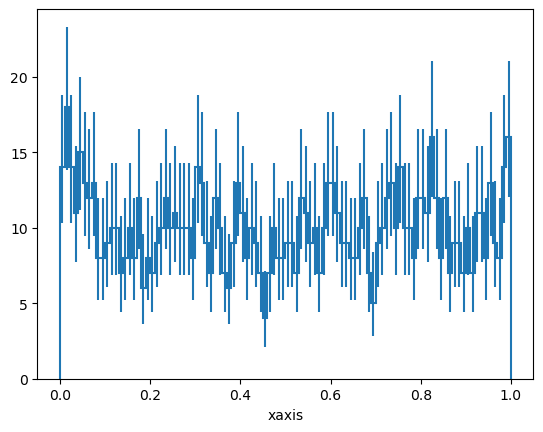

In [3]:
h = file["hstat"]
h.to_hist().plot()
h.values()


### Abrir datos:

In [4]:
t = file["T"]
t.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event                | Event                    | AsGroup(<TBranchElement 'ev...
event/TObject        | (group of fUniqueID:u... | AsGroup(<TBranchElement 'TO...
event/TObject/fUn... | uint32_t                 | AsDtype('>u4')
event/TObject/fBits  | uint32_t                 | AsDtype('>u4')
event/fType[20]      | int8_t[20]               | AsDtype("('i1', (20,))")
event/fEventName     | char*                    | AsStrings(length_bytes='4')
event/fNtrack        | int32_t                  | AsDtype('>i4')
event/fNseg          | int32_t                  | AsDtype('>i4')
event/fNvertex       | uint32_t                 | AsDtype('>u4')
event/fFlag          | uint32_t                 | AsDtype('>u4')
event/fTemperature   | float                    | AsDtype('>f4', 'float64')
event/fMeasures[10]  | int32_t[10]              | AsDtype

In [5]:
#t.keys()
t["event/fNtrack"]
#t["event/fNtrack"].typename
#t["event/fNtrack"].interpretation

<TBranchElement 'fNtrack' at 0x7fb6d0a38b50>

El método mas directo de leer un archivo de datos es con la función **array**

In [6]:
t["event/fNtrack"].array()

<Array [600, 604, 603, 594, 595, ..., 598, 600, 596, 593] type='1000 * int32'>

In [7]:
tree = t['event']
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event                | Event                    | AsGroup(<TBranchElement 'event
TObject              | (group of fUniqueID:u... | AsGroup(<TBranchElement 'TO...
TObject/fUniqueID    | uint32_t                 | AsDtype('>u4')
TObject/fBits        | uint32_t                 | AsDtype('>u4')
fType[20]            | int8_t[20]               | AsDtype("('i1', (20,))")
fEventName           | char*                    | AsStrings(length_bytes='4')
fNtrack              | int32_t                  | AsDtype('>i4')
fNseg                | int32_t                  | AsDtype('>i4')
fNvertex             | uint32_t                 | AsDtype('>u4')
fFlag                | uint32_t                 | AsDtype('>u4')
fTemperature         | float                    | AsDtype('>f4', 'float64')
fMeasures[10]        | int32_t[10]              | AsDtype

In [8]:
tracks = tree["fTracks"]
tracks.show()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fTracks              | TClonesArray*            | AsGroup(<TBranchElement 'fTrac
fTracks.fUniqueID    | uint32_t[]               | AsJagged(AsDtype('>u4'))
fTracks.fBits        | uint32_t[]               | AsJagged(AsDtype('>u4'))
fTracks.fPx          | float[]                  | AsJagged(AsDtype('>f4'))
fTracks.fPy          | float[]                  | AsJagged(AsDtype('>f4'))
fTracks.fPz          | float[]                  | AsJagged(AsDtype('>f4'))
fTracks.fRandom      | float[]                  | AsJagged(AsDtype('>f4'))
fTracks.fMass2       | Float16_t[]              | AsJagged(AsFloat16(0.0, 0.0...
fTracks.fBx          | Float16_t[]              | AsJagged(AsFloat16(0.0, 0.0...
fTracks.fBy          | Float16_t[]              | AsJagged(AsFloat16(0.0, 0.0...
fTracks.fMeanCharge  | float[]                  | AsJagged(AsDty

In [9]:
#file["T"]["event"]["fTracks.fPx"].arrays()
file["T/event/fTracks.fPx"].arrays()


<Array [{'fTracks.fPx': [...]}, ..., {...}] type='1000 * {"fTracks.fPx": va...'>

In [10]:
chg = file["T/event/fTracks.fCharge"] 
px = file["T/event/fTracks.fPx"] #arraeglos de diferentes tipos
py = file["T/event/fTracks.fPy"] #arraeglos de diferentes tipos
pz = file["T/event/fTracks.fPz"]#arraeglos de diferentes tipos

px.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fTracks.fPx          | float[]                  | AsJagged(AsDtype('>f4'))      


# Akward

Matrices irregulares: Pueden tener diferentes longitudes

https://awkward-array.org/doc/main/index.html

In [13]:
import awkward as ak

pt = ak.flatten(np.sqrt(px.array() ** 2 + py.array() ** 2))
p = np.sqrt(px.array() ** 2 + py.array() ** 2 + pz.array() ** 2)
eta = ak.flatten(0.5*np.log((p+px.array())/(p-px.array())))
phi = ak.flatten(np.arctan(py.array()/px.array()))


Text(0, 0.5, 'dN/$\\phi$')

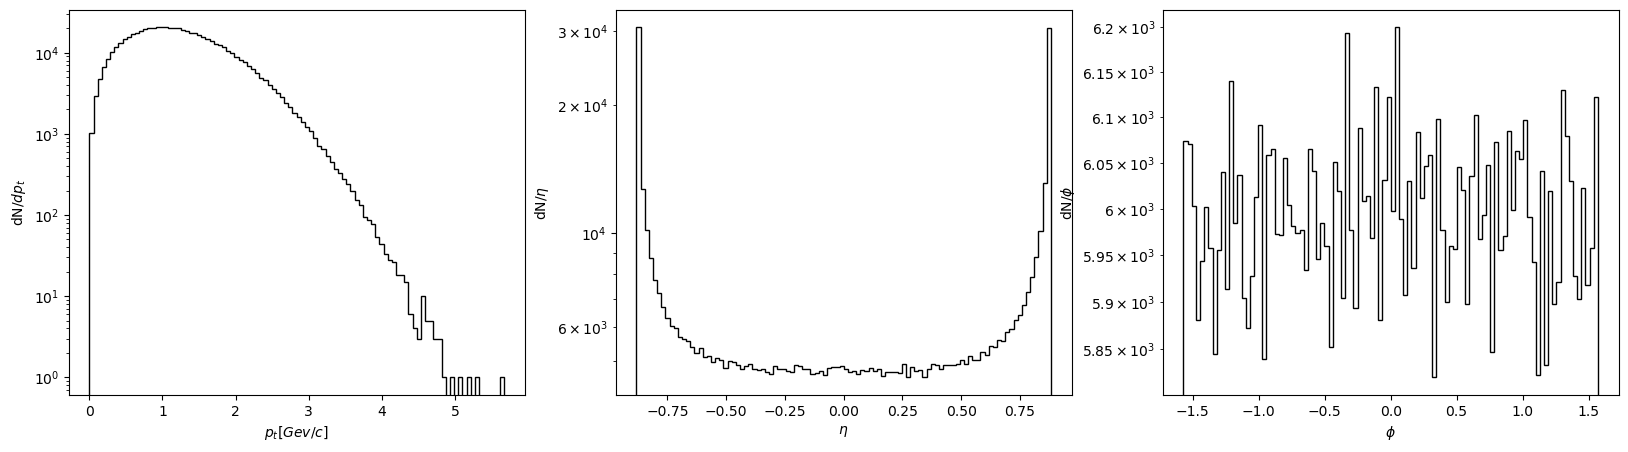

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(pt,density=False, bins = 100 , log=True, color ='black',histtype = 'step')

plt.xlabel('$p_t [Gev/c]$')
plt.ylabel('dN/$dp_t$')

plt.subplot(1,3,2)
plt.hist(eta,density=False, bins = 100 , color = 'black',log=True,histtype = 'step')
plt.xlabel('$\eta$')
plt.ylabel('dN/$\eta$')

plt.subplot(1,3,3)
plt.hist(phi,density=False, bins = 100 , color = 'black',log=True,histtype = 'step')
plt.xlabel('$\phi$')
plt.ylabel('dN/$\phi$')